# Welcome to this kernel

The goal of this kernel is very simple. It aims to provide some useful insights about the data and hopefully can guide you into what features to generate and how to tackle the modelling part.

<a id ="table_of_contents"></a>
# Table of contents


[Imports](#imports)

[Quick look at shops df](#quick_look_shops)

[Fix shops df and generate some features](#fix_shops)

[Quick look at item category df](#quick_look_item_cat)

[Quick look at items df](#quick_look_item)

[Quick look at sales df](#quick_look_sales)

[Joining df](#join_df)

[Exploratory Data Analysis (EDA)](#eda)

[Viz of sales per week, month of shops and item_category columns](#sales_viz)

[Total sales and the variation on secondary axis](#sales_viz_2_axis)

--> [Question 1: Create a plot with the moving average of total sales (7 days) and the variation on the second axis.](#question_1)

[Calendar heatmap](#calendar_heatmap)

[Timeseries autocorrelation and partial autocorrelation plots: daily sales](#corr_plots_daily)

[Manually calculate the Partial Autocorrelation](#autocorrelation_calculation)

[Timeseries decomposition plots: weekly sales](#decomp_weekly)

--> [Question 2: Create a decomposition plot for a city of weekly sales](#question_2)

[Visualizing the most important cities](#viz_cities)

--> [Question 3: Create a treemap plot for item_category and the total combined sales](#question_3)

[Visualizing nulls values](#viz_null_values)

[Visualization of outliers](#viz_outliers)

[Conclusion](#conclusion)

<a id = "imports"></a>
# Imports
[Go back to the Table of Contents](#table_of_contents)

In [1]:
! pip install calmap

In [2]:
import calmap

In [3]:
! pip install squarify

In [4]:
import squarify

In [5]:
import os
    
# Main libraries that we will use in this kernel
import datetime
import numpy as np
import pandas as pd

# # garbage collector: free some memory is needed
import gc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# statistical package and some useful functions to analyze our timeseries
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as stattools

import time

from string import punctuation
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [6]:
PATH_DATA = "../input/nuclio08-dsc-0921"

In [7]:
def print_files():
    for dirname, _, filenames in os.walk(PATH_DATA):
        for filename in filenames:
            print(os.path.join(dirname, filename))

In [8]:
# Let's see how many different files we are dealing with
print_files()

../input/nuclio08-dsc-0921/items.csv
../input/nuclio08-dsc-0921/item_categories.csv
../input/nuclio08-dsc-0921/sales_test_no_data.csv
../input/nuclio08-dsc-0921/sales_train.csv
../input/nuclio08-dsc-0921/shops.csv
../input/nuclio08-dsc-0921/test_mean_sales.csv


<a id = "quick_look_shops"></a>
# Quick look at shops df
[Go back to the Table of Contents](#table_of_contents)

In [9]:
# import the df
shops = pd.read_csv(os.path.join(PATH_DATA, "shops.csv"))
shops.shape

(60, 2)

In [10]:
shops.head()

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 Franc",0
1,"! Yakutsk TC ""central"" Franco",1
2,"Adygea TC ""mega""",2
3,"Balashikha TRC ""Octubre-Kinomir""",3
4,"Volzhski centro comercial ""Volga Mall""",4


In [11]:
# We don't have any duplicates in the shop_name field
shops.shape[0] == len(shops["shop_name"].unique())

True

In [12]:
shops

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 Franc",0
1,"! Yakutsk TC ""central"" Franco",1
2,"Adygea TC ""mega""",2
3,"Balashikha TRC ""Octubre-Kinomir""",3
4,"Volzhski centro comercial ""Volga Mall""",4
5,"Vlogda SEC ""Mermelada""",5
6,"Voronezh (Plekhanovskaya, 13)",6
7,"Voronezh SEC ""Maksimir""",7
8,"Voronezh centro comercial City Park ""Castillo""",8
9,comercio ambulante,9


In [13]:
# However inspecting the df by name, we can see that shop_id 10 and 11 are very similar. Later we will try and group them once we inspect the sales per shop
shops[shops["shop_id"].isin([10, 11])]

,shop_name,shop_id
10,Zhukovsky calle. 39m Chkalov?,10
11,Zhukovsky calle. 39m² Chkalov,11


In [14]:
# The same happens with the shops with shop_id 23 and 24
shops[shops["shop_id"].isin([23, 24])]

,shop_name,shop_id
23,"Moscú TK ""Budenovsky"" (pav.A2)",23
24,"Moscú TK ""Budenovsky"" (pav.K7)",24


In [15]:
# No missing values in the shops df
shops.isnull().sum().sum()

0

<a id = "fix_shops"></a>
# Fix shops df and generate some features
[Go back to the Table of Contents](#table_of_contents)

In [16]:
city_dict = {
    2 : 'Adygea',
    3 : 'Balashikha',
    4 : 'Volzhski',
    5 : 'Vlogda',
    6 : 'Voronezh',
    7 : 'Voronezh',
    8 : 'Voronezh',
    9 : 'Comercio Ambulante',
    11 : 'Zhukovsky',
    12 : 'Tienda Online',
    13 : 'Kazan',
    14 : 'Kazan',
    15 : 'Kaluga',
    16 : 'Kolomna',
    17 : 'Krasnoyarsk',
    18 : 'Krasnoyarsk',
    19 : 'Kursk',
    20 : 'Moscú',
    21 : 'Moscú',
    22 : 'Moscú',
    24 : 'Moscú',
    25 : 'Moscú',
    26 : 'Moscú',
    27 : 'Moscú',
    28 : 'Moscú',
    29 : 'Moscú',
    30 : 'Moscú',
    31 : 'Moscú',
    32 : 'Moscú',
    33 : 'Mytishchi',
    34 : 'Nizhny Novgorod',
    35 : 'Nizhny Novgorod',
    36 : 'Novosibirsk',
    37 : 'Novosibirsk',
    38 : 'Omsk',
    39 : 'Rostov Na Donu',
    40 : 'Rostov Na Donu',
    41 : 'Rostov Na Donu',
    42 : 'San Petersburgo',
    43 : 'San Petersburgo',
    44 : 'Samara',
    45 : 'Samara',
    46 : 'Posad',
    47 : 'Surgut',
    48 : 'Tomsk',
    49 : 'Tyumen',
    50 : 'Tyumen',
    51 : 'Tyumen',
    52 : 'Ufa',
    53 : 'Ufa',
    54 : 'Khimki',
    55 : 'Tienda Online',
    56 : 'Checos',
    57 : 'Yakutsk',
    58 : 'Yakutsk',
    59 : 'Yaroslavl'
}

In [17]:
def fix_shops(shops, city_dict):
    '''
    This function modifies the shops df inplace.
    It correct's 3 shops that we have found to be 'duplicates'
    and also creates a few more features: extracts the city and encodes it using LabelEncoder
    '''
    shops = shops[~shops["shop_id"].isin([0, 1, 10, 23])]

    # replace all the punctuation in the shop_name columns
    shops["shop_name_cleaned"] = shops["shop_name"].apply(lambda s: "".join([x for x in s if x not in punctuation]))
    
    # extract the city name
    shops["city"] = shops["shop_id"].map(city_dict)
    
    # encode it using a simple LabelEncoder
    shops["city_code"] = LabelEncoder().fit_transform(shops['city'])
    
    return shops

In [18]:
# apply our function to the shops_df
shops = fix_shops(shops, city_dict)

In [19]:
shops

,shop_name,shop_id,shop_name_cleaned,city,city_code
2,"Adygea TC ""mega""",2,Adygea TC mega,Adygea,0
3,"Balashikha TRC ""Octubre-Kinomir""",3,Balashikha TRC OctubreKinomir,Balashikha,1
4,"Volzhski centro comercial ""Volga Mall""",4,Volzhski centro comercial Volga Mall,Volzhski,25
5,"Vlogda SEC ""Mermelada""",5,Vlogda SEC Mermelada,Vlogda,24
6,"Voronezh (Plekhanovskaya, 13)",6,Voronezh Plekhanovskaya 13,Voronezh,26
7,"Voronezh SEC ""Maksimir""",7,Voronezh SEC Maksimir,Voronezh,26
8,"Voronezh centro comercial City Park ""Castillo""",8,Voronezh centro comercial City Park Castillo,Voronezh,26
9,comercio ambulante,9,comercio ambulante,Comercio Ambulante,3
11,Zhukovsky calle. 39m² Chkalov,11,Zhukovsky calle 39m² Chkalov,Zhukovsky,29
12,La tienda en línea Emergencias,12,La tienda en línea Emergencias,Tienda Online,20


<a id = "quick_look_item_cat"></a>
# Quick look at items_category df
[Go back to the Table of Contents](#table_of_contents)

In [20]:
# import df
items_category = pd.read_csv(os.path.join(PATH_DATA, "item_categories.csv"))
items_category.shape

(84, 2)

In [21]:
items_category.head()

,item_category_name,item_category_id
0,PC - Auriculares / Auriculares,0
1,Accesorios - PS2,1
2,Accesorios - PS3,2
3,Accesorios - PS4,3
4,Accesorios - PSP,4


In [22]:
# We don't have any duplicates in the item_category_name field
items_category.shape[0] == len(items_category["item_category_name"].unique())

True

In [23]:
# allow pandas to show all the rows from this df
pd.options.display.max_rows = items_category.shape[0]

In [24]:
# If we take a closer look, we can see that we have a lot of Play Station categories: like accesories, games and so on. We have the same categories for XBOX and also for PC Games.
# A lot of categories have to deal with books, presents and computer software and music (CD).
# We will generate later some features by parsing the names and making groupedby features.
items_category.head()

,item_category_name,item_category_id
0,PC - Auriculares / Auriculares,0
1,Accesorios - PS2,1
2,Accesorios - PS3,2
3,Accesorios - PS4,3
4,Accesorios - PSP,4


In [25]:
# If we apply a simple lambda function and extract the everything that contains PS, we will get 16 different categories for PlayStation
items_category["PS_flag"] = items_category["item_category_name"].apply(lambda x: True if "PS" in x else False)
items_category[items_category["PS_flag"] == True]

,item_category_name,item_category_id,PS_flag
1,Accesorios - PS2,1,True
2,Accesorios - PS3,2,True
3,Accesorios - PS4,3,True
4,Accesorios - PSP,4,True
5,Accesorios - PSVita,5,True
10,consolas de juegos - PS2,10,True
11,consolas de juegos - PS3,11,True
12,consolas de juegos - PS4,12,True
13,consolas de juegos - PSP,13,True
14,consolas de juegos - PSVita,14,True


In [26]:
# No missing values in the items_category df
items_category.isnull().sum().sum()

0

<a id = "quick_look_item"></a>
# Quick look at items df
[Go back to the Table of Contents](#table_of_contents)

In [27]:
# import df
items = pd.read_csv(os.path.join(PATH_DATA, "items.csv"))
items.shape

(899, 3)

In [28]:
# allow pandas to show all the rows from this df
pd.options.display.max_rows = items.shape[0]
items.head()

,item_name,item_id,item_category_id
0,"007: coordenadas ""SKAYFOLL""",30,40
1,"007: Coordenadas ""SKAYFOLL» (BD)",31,37
2,1 + 1,32,40
3,1 + 1 (BD),33,37
4,12 Años de un esclavo (región),77,40


In [29]:
# No missing values in the items category
items.isnull().sum().sum()

0

In [30]:
# Let's see the top 10 and bottom 10 item categories
items_gb = items.groupby("item_category_id").size().sort_values(ascending = False).to_frame()
items_gb.head()

,0
item_category_id,
40,165
30,145
19,96
28,71
23,51


In [31]:
items_gb.rename(columns = {0:"counts"}, inplace = True)

In [32]:
top_10 = items_gb[:10]

In [33]:
bottom_10 = items_gb[-10:]

In [34]:
top_10 = top_10.append(bottom_10)
top_10 = top_10.sort_values("counts", ascending = False)

In [35]:
top_10.reset_index()

,item_category_id,counts
0,40,165
1,30,145
2,19,96
3,28,71
4,23,51
5,20,51
6,55,45
7,65,32
8,21,18
9,37,16


In [36]:
# We can notice that in the top 10 most popular items products we have PS3
# At the same time, in the bottom 10 products, we can find 2 PS2.
# This means, that we have to be careful while generating features like PS
pd.merge(top_10, items_category, left_on = "item_category_id", right_on = "item_category_id")

,item_category_id,counts,item_category_name,PS_flag
0,40,165,Película - DVD,False
1,30,145,Juegos PC - Standard Edition,False
2,19,96,Juegos - PS3,True
3,28,71,Juegos PC - Otras publicaciones,False
4,23,51,Juegos - XBOX 360,False
5,20,51,Juegos - PS4,True
6,55,45,Música - CD de la producción local,False
7,65,32,Regalos - Juegos (compacto),False
8,21,18,Juegos - PSP,True
9,37,16,Película - Blu-Ray,False


<a id = "quick_look_sales"></a>
# Quick look at sales df
[Go back to the Table of Contents](#table_of_contents)

In [37]:
# import df
sales = pd.read_csv(os.path.join(PATH_DATA, "sales_train.csv"))
sales.shape

(275993, 6)

In [38]:
sales.sample(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
205243,03.11.2014,22,46,5240,799.0,1.0
157140,07.11.2013,10,25,3734,2599.0,2.0
169719,15.06.2014,17,25,11811,1599.0,1.0
142712,28.09.2013,8,46,4870,799.0,1.0
116331,20.02.2014,13,16,20949,5.0,3.0
91700,07.02.2014,13,57,3076,399.5,1.0
17612,02.11.2014,22,28,6185,499.0,1.0
217619,24.10.2014,21,28,7790,799.0,1.0
19169,23.01.2015,24,28,3556,999.0,2.0
262057,16.01.2015,24,25,3443,1299.0,1.0


In [39]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275993 entries, 0 to 275992
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            275993 non-null  object 
 1   date_block_num  275993 non-null  int64  
 2   shop_id         275993 non-null  int64  
 3   item_id         275993 non-null  int64  
 4   item_price      275993 non-null  float64
 5   item_cnt_day    275993 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 12.6+ MB


In [40]:
# No null values in the sales df

# Is this True?

sales.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [41]:
sorted(list(sales["item_cnt_day"].unique()))[:20]

[-5.0,
 -4.0,
 -2.0,
 -1.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0]

In [42]:
del shops, items_category, items, sales
gc.collect()

72

<a id = "join_df"></a>
# Joining df
[Go back to the Table of Contents](#table_of_contents)

In [43]:
# a simple function that creates a global df with all joins and also shops corrections
def create_df(path, city_dict):
    '''
    This is a helper function that creates the train df.
    '''
    # import all df
    shops = pd.read_csv(os.path.join(path, "shops.csv"))                    
    items_category = pd.read_csv(os.path.join(path, "item_categories.csv"))
    items = pd.read_csv(os.path.join(path, "items.csv"))
    sales = pd.read_csv(os.path.join(path, "sales_train.csv"))
    
    # fix shop_id in sales so that we can leater merge the df
    
    d_shops = {0:57, 1:58, 10:11, 23:24}
    sales["shop_id"] = sales["shop_id"].map(lambda shop_id: d_shops[shop_id] if shop_id in d_shops.keys() else shop_id)
    sales_shape_start = sales.shape[0]
    shops = fix_shops(shops, city_dict) # fix the shops as we have seen before
    
    # create df by merging the previous dataframes
    df = pd.merge(items, items_category, left_on = "item_category_id", right_on = "item_category_id")
    df = pd.merge(sales, df, left_on = "item_id", right_on = "item_id")
    df = pd.merge(df, shops, left_on = "shop_id", right_on = "shop_id")
    
    # sort the values
    df.sort_values(by = ["shop_id", "date"], ascending = True, inplace = True)
    df_shape_end = df.shape[0]
    
    assert sales_shape_start == df_shape_end, "You have created a cartessian!"
    
    return df

In [44]:
df = create_df(path = PATH_DATA, city_dict = city_dict)

<a id = "eda"></a>
# Exploratory Data Analysis (EDA)
[Go back to the Table of Contents](#table_of_contents)

In [45]:
# It seems that there are no null values, however this is not fully true. 
# As we will see in the next section, when we groupby and plot the data, there are a lot of months where there have been no sales so basically it's a null value, and we have to impute zero sales for that month.
df.isnull().sum().sum()

0

<a id = "sales_viz"></a>
# Viz of sales per week, month of shops and item_category columns
[Go back to the Table of Contents](#table_of_contents)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275993 entries, 224519 to 184697
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                275993 non-null  object 
 1   date_block_num      275993 non-null  int64  
 2   shop_id             275993 non-null  int64  
 3   item_id             275993 non-null  int64  
 4   item_price          275993 non-null  float64
 5   item_cnt_day        275993 non-null  float64
 6   item_name           275993 non-null  object 
 7   item_category_id    275993 non-null  int64  
 8   item_category_name  275993 non-null  object 
 9   shop_name           275993 non-null  object 
 10  shop_name_cleaned   275993 non-null  object 
 11  city                275993 non-null  object 
 12  city_code           275993 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 29.5+ MB


In [47]:
# Let's group by Month and see all the sales

# resample in timeseries is the same as groupby
# in order it to work, we must set the date column as index, and it must be a datetime format (strings are not valid)
# when we resample it, we can pass D: daily, W: weekly or M: monthly
# we can then perform operation on the 'resampled' columns like
# sum, mean and others.

# calculate the monthly sales
df["date"] = pd.to_datetime(df["date"], format = "%d.%m.%Y")

In [48]:
df["Year"] = df["date"].dt.year

In [49]:
df["Month"] = df["date"].dt.month

In [50]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,shop_name_cleaned,city,city_code,Year,Month
224519,2013-02-01,1,6,3141,1130.0,1.0,ESET NOD32 Smart Security - una extensión de l...,75,Programa - Para el hogar y la oficina,"Voronezh (Plekhanovskaya, 13)",Voronezh Plekhanovskaya 13,Voronezh,26,2013,2
224683,2013-02-01,1,6,2308,799.0,1.0,"Call of Duty: Operaciones Negro II [PC, Jewel,...",30,Juegos PC - Standard Edition,"Voronezh (Plekhanovskaya, 13)",Voronezh Plekhanovskaya 13,Voronezh,26,2013,2
225605,2013-02-01,1,6,3851,899.0,1.0,Heavy Rain (Esenciales) (con soporte para PS M...,19,Juegos - PS3,"Voronezh (Plekhanovskaya, 13)",Voronezh Plekhanovskaya 13,Voronezh,26,2013,2
225720,2013-02-01,1,6,4240,1999.0,1.0,Kinect Dance Central 3 (sólo MS Kinect) [Xbox ...,23,Juegos - XBOX 360,"Voronezh (Plekhanovskaya, 13)",Voronezh Plekhanovskaya 13,Voronezh,26,2013,2
225796,2013-02-01,1,6,7856,799.0,3.0,Mundo de Warcraft. posesión de la tarjeta de p...,28,Juegos PC - Otras publicaciones,"Voronezh (Plekhanovskaya, 13)",Voronezh Plekhanovskaya 13,Voronezh,26,2013,2


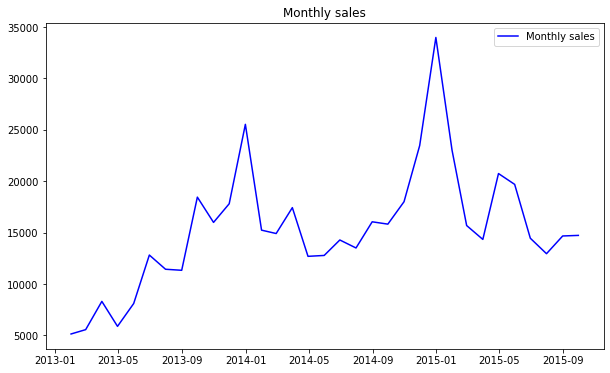

In [51]:
# resample the data on a monthly basis
x = df[["date", "item_cnt_day"]].set_index("date").resample("M").sum()

# plot the data using matplotlib
plt.figure(figsize = (10, 6))
plt.plot(x, color = "blue", label = "Monthly sales")
plt.title("Monthly sales")
plt.legend();

From our very first and simple figure, we can already extract very useful information.
* First of all, we can see big spikes in January, like to be motivated with national holidays in Russia.
* Second: we see a general trend to decline in our timeseries. If you are planning to use a parametrical model, you must take into account this.

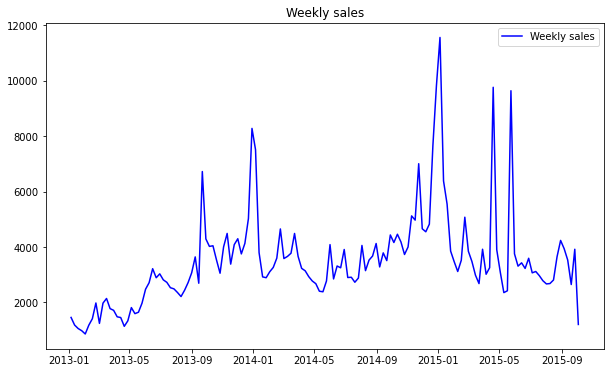

In [52]:
# perform the same operations but on a weekly basis
x = df[["date", "item_cnt_day"]].set_index("date").resample("W").sum()

plt.figure(figsize = (10, 6))
plt.plot(x.index, x, color = "blue", label = "Weekly sales")
plt.title("Weekly sales")
plt.legend();

Analyzing data on a weekly basis, gives us much more information. We can see more variation between weeks, but the main point stays the same: we have spines in January and sales that go down overtime.

In the next plots we will represent the monthly sales (left plot) and weekly sales (right plot) for each shop. 

In the light red/pink areas of each plot, we will mark the national holidays in Russia and see if there is any connection with sales spikes.

In [53]:
russian_holidays_start = [
datetime.datetime(2013, 1, 1),
datetime.datetime(2013, 2, 23),
datetime.datetime(2013, 3, 8),
datetime.datetime(2013, 5, 1),
datetime.datetime(2013, 5, 9),
datetime.datetime(2013, 6, 12),
datetime.datetime(2013, 11, 4),

datetime.datetime(2014, 1, 1),
datetime.datetime(2014, 2, 23),
datetime.datetime(2014, 3, 8),
datetime.datetime(2014, 5, 1),
datetime.datetime(2014, 5, 9),
datetime.datetime(2014, 6, 12),
datetime.datetime(2014, 11, 4),

datetime.datetime(2015, 1, 1),
datetime.datetime(2015, 2, 23),
datetime.datetime(2015, 3, 8),
datetime.datetime(2015, 5, 1),
datetime.datetime(2015, 5, 9),
datetime.datetime(2015, 6, 12),
datetime.datetime(2015, 11, 4)
]

In [54]:
russian_holidays_end = [
datetime.datetime(2013, 1, 8),
datetime.datetime(2013, 2, 23),
datetime.datetime(2013, 3, 8),
datetime.datetime(2013, 5, 1),
datetime.datetime(2013, 5, 9),
datetime.datetime(2013, 6, 12),
datetime.datetime(2013, 11, 4),

datetime.datetime(2014, 1, 8),
datetime.datetime(2014, 2, 23),
datetime.datetime(2014, 3, 8),
datetime.datetime(2014, 5, 1),
datetime.datetime(2014, 5, 9),
datetime.datetime(2014, 6, 12),
datetime.datetime(2014, 11, 4),

datetime.datetime(2015, 1, 8),
datetime.datetime(2015, 2, 23),
datetime.datetime(2015, 3, 8),
datetime.datetime(2015, 5, 1),
datetime.datetime(2015, 5, 9),
datetime.datetime(2015, 6, 12),
datetime.datetime(2015, 11, 4)
]

In [55]:
def create_ma_df(df, column_to_filter, iterable, period):

    short_df = df[df[column_to_filter] == iterable][["date","item_cnt_day"]]
    short_df["date"] = pd.to_datetime(short_df["date"], format = "%d.%m.%Y")
    short_df["YEAR"] = short_df["date"].dt.year
    short_df = short_df.set_index("date").groupby("YEAR").resample(period)["item_cnt_day"].sum()
    short_df = short_df.reset_index()
    
    short_df[f"MA3{period}"] = short_df["item_cnt_day"].rolling(window = 3).mean()
    short_df[f"MA4{period}"] = short_df["item_cnt_day"].rolling(window = 4).mean()
    short_df[f"MA5{period}"] = short_df["item_cnt_day"].rolling(window = 5).mean()
    
    return short_df

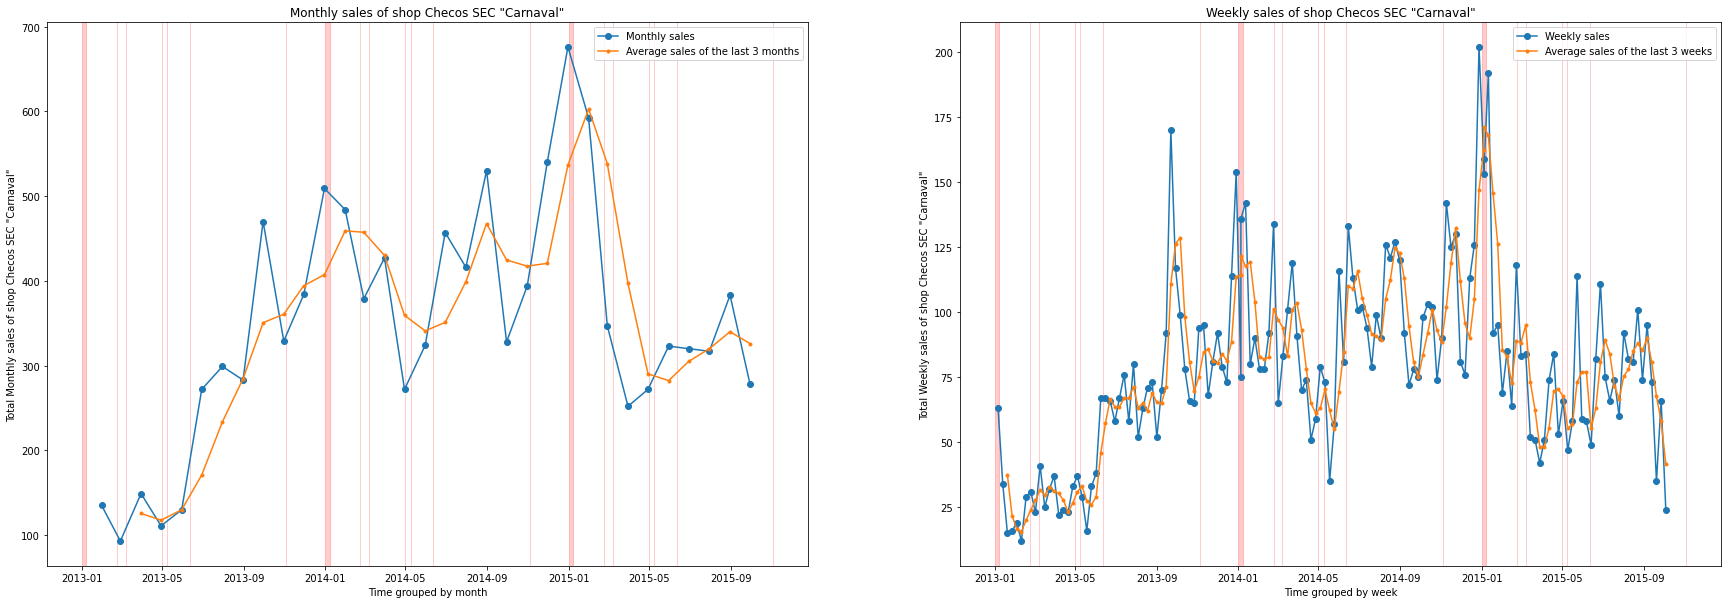

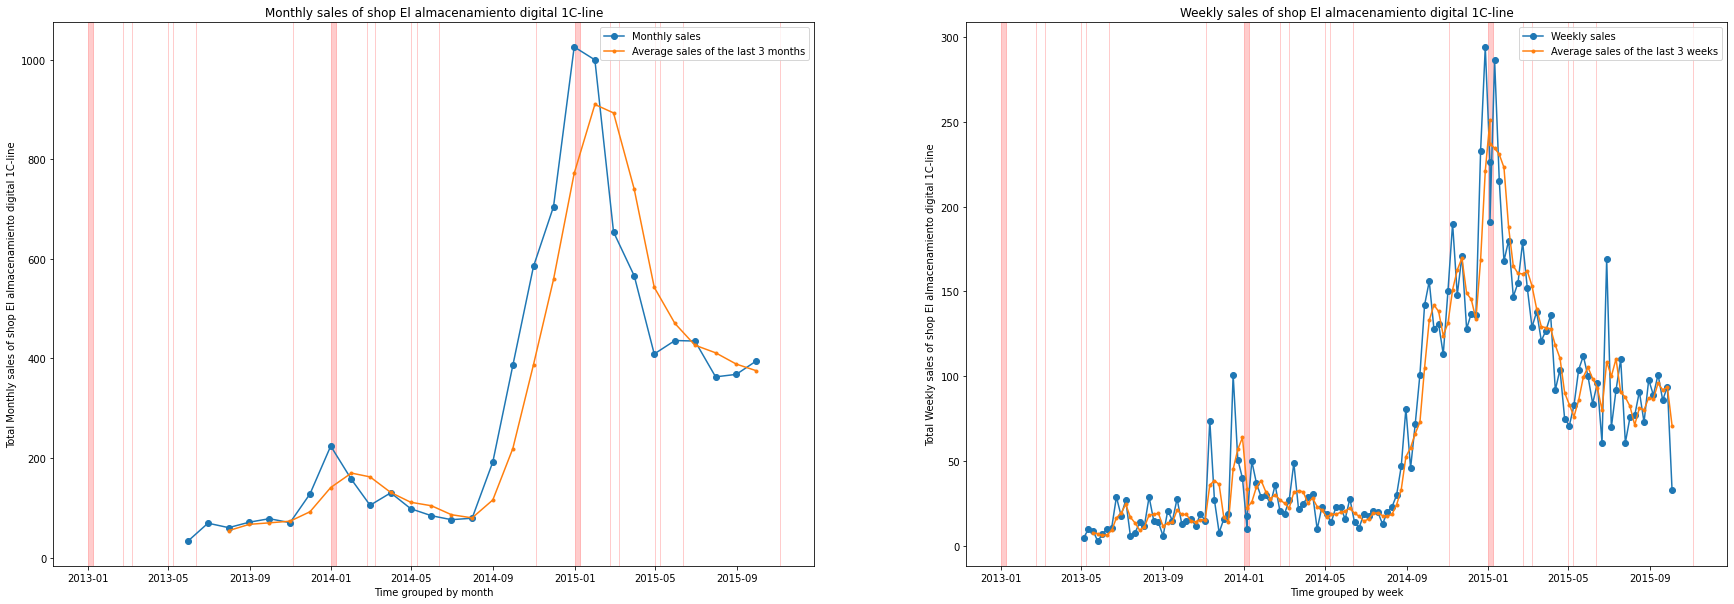

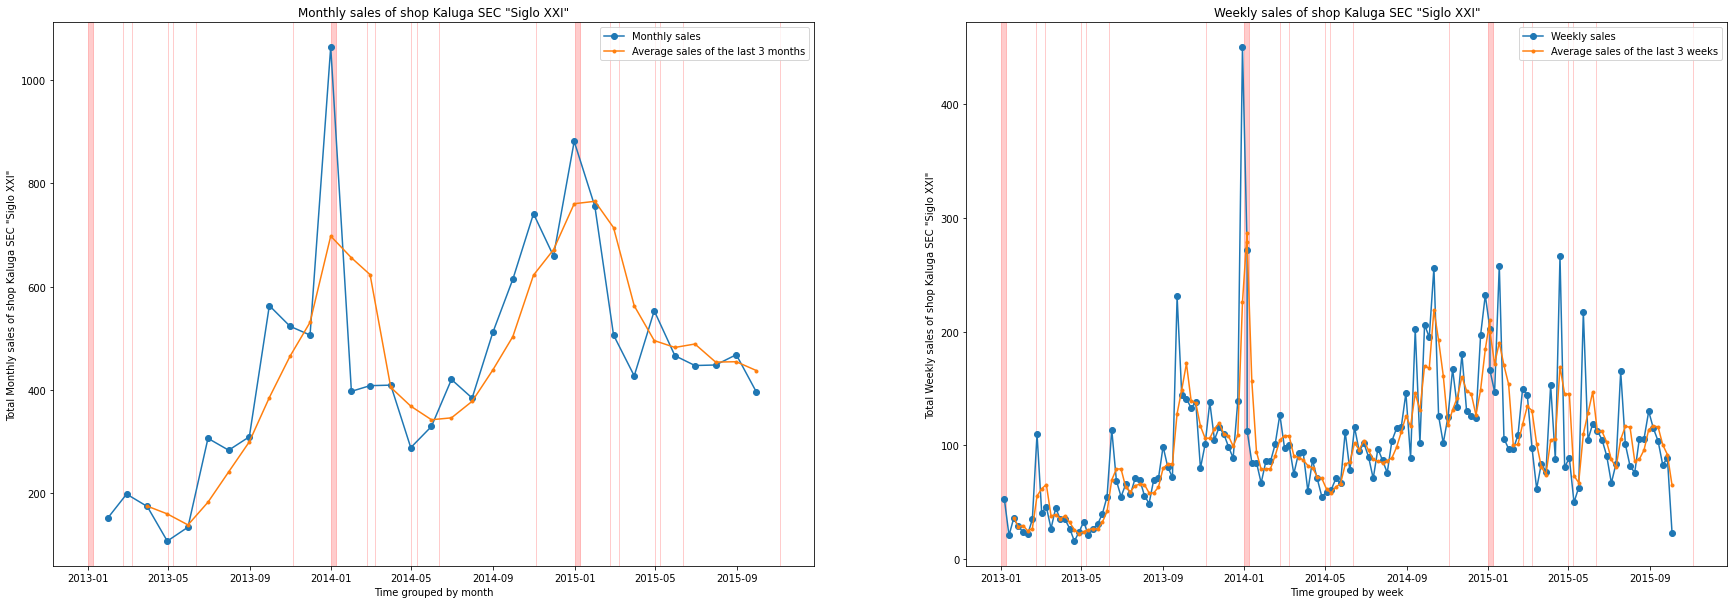

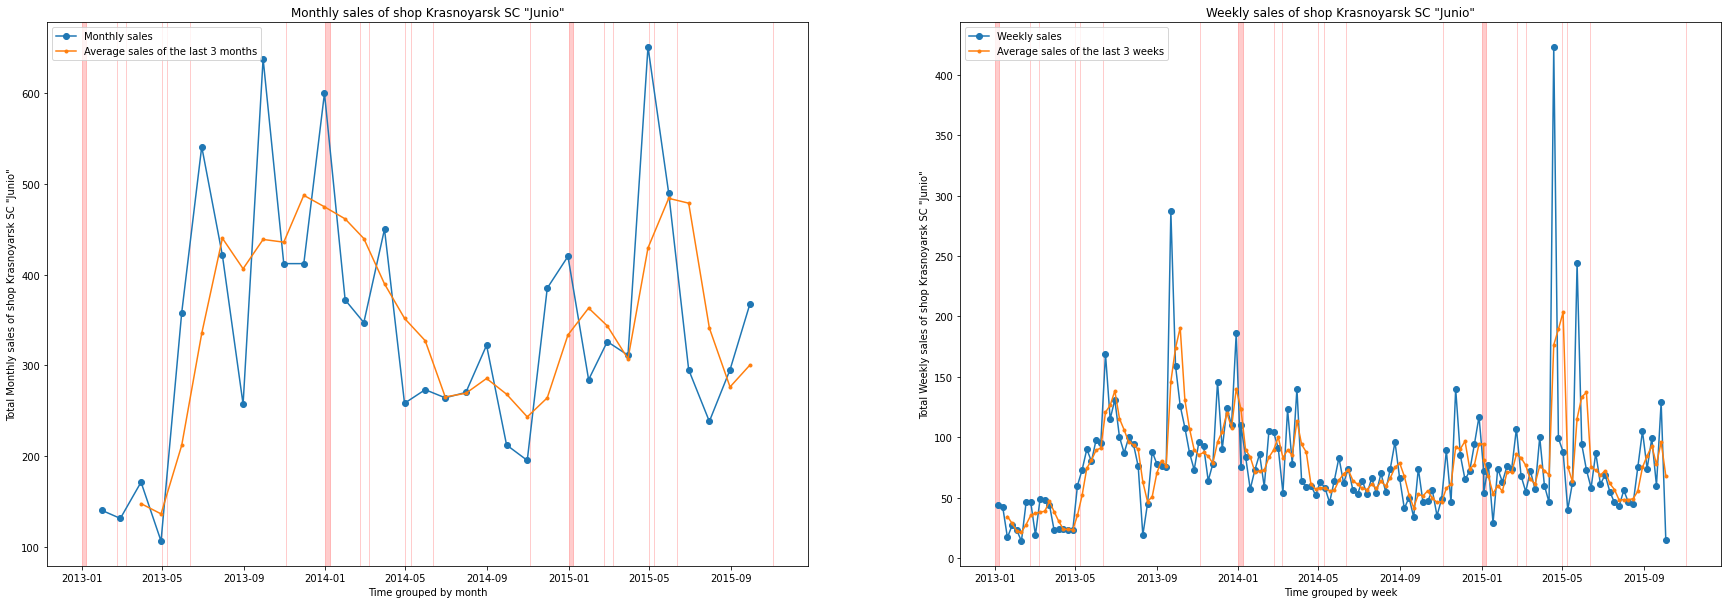

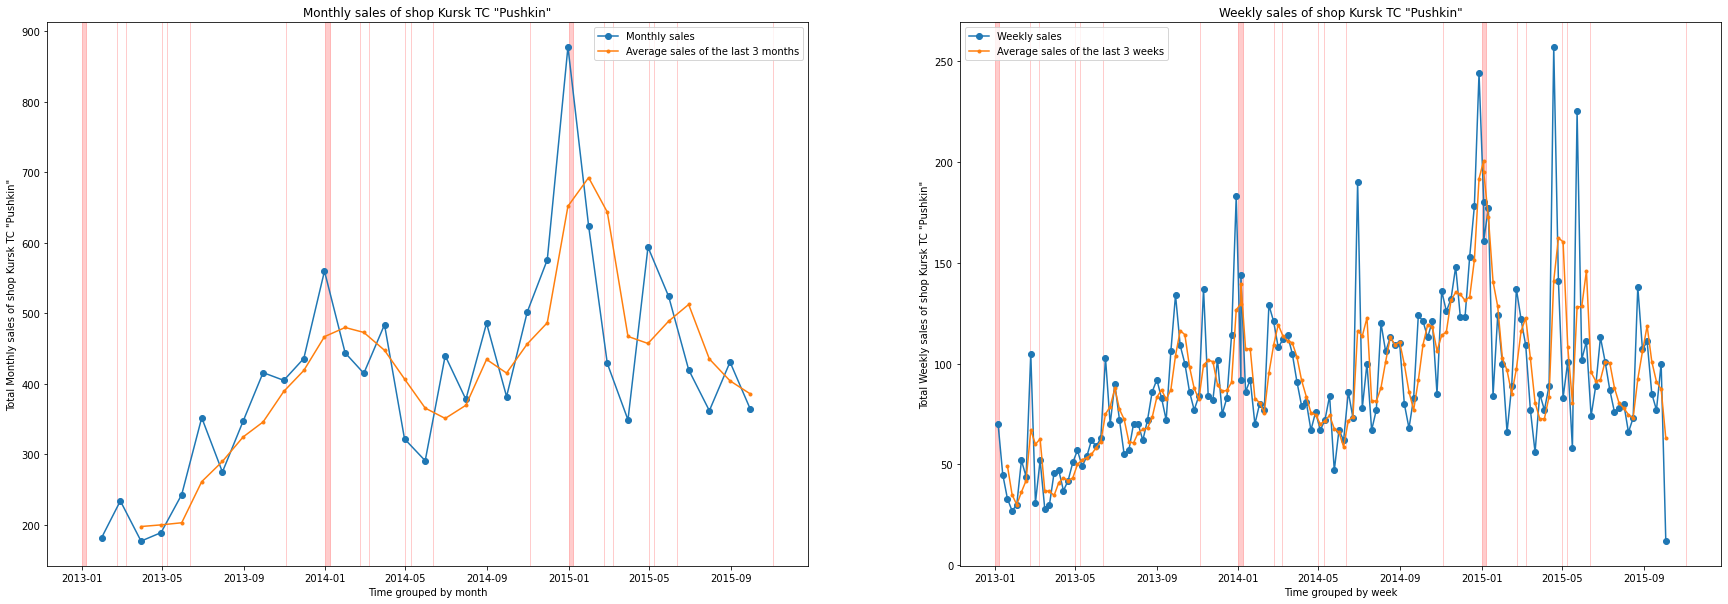

In [56]:
ITERABLE_COLUMN = "shop_name"
# ITERABLE_COLUMN = "item_category_name"
# ITERABLE_COLUMN = "city"

for iterable in sorted(list(df[ITERABLE_COLUMN].unique()))[:5]:

    #######################################################################################
    # Monthly sales
    #######################################################################################
    
    # create the size of the figure
    plt.figure(figsize = (30, 10))
    plt.subplot(1, 2, 1)
    
    # create a df with ma sales
    short_df = create_ma_df(df, ITERABLE_COLUMN, iterable, "M")
    
    # preparing the data to plot
    sales = short_df["item_cnt_day"]
    dates = short_df["date"]
    average_3_months = short_df["MA3M"]

    # plot the data and add label
    plt.plot(dates, sales, 'o-', label = "Monthly sales")
    plt.plot(dates, average_3_months, '.-', label = "Average sales of the last 3 months")

    # get current axis and plot the areas
    ax = plt.gca()
    alpha = 0.2
    
    for start_date, end_date in zip(russian_holidays_start, russian_holidays_end):
        
        # add shaded areas for holidays 2013
        ax.axvspan(start_date, end_date, alpha = alpha, color = 'red')    
       
    # add title and show legend    
    plt.title('Monthly sales of shop {}'.format(iterable))
    plt.ylabel('Total Monthly sales of shop {}'.format(iterable))
    plt.xlabel("Time grouped by month")
    plt.legend()
    
    #######################################################################################
    # Weekly sales
    #######################################################################################
    
    plt.subplot(1, 2, 2)
    
    # create a df with ma sales
    short_df = create_ma_df(df, ITERABLE_COLUMN, iterable, "W")
    
    # preparing the data to plot
    sales = short_df["item_cnt_day"]
    dates = short_df["date"]
    average_3_weeks = short_df["MA3W"]

    # plot the data and add label
    plt.plot(dates, sales, 'o-', label = "Weekly sales")
    plt.plot(dates, average_3_weeks, '.-', label = "Average sales of the last 3 weeks")
    
    # get current axis and plot the areas
    ax = plt.gca()
    
    for start_date, end_date in zip(russian_holidays_start, russian_holidays_end):
        
        # add shaded areas for holidays 2013
        ax.axvspan(start_date, end_date, alpha = alpha, color = 'red')
    
    # add title and show legend
    plt.title('Weekly sales of shop {}'.format(iterable))
    plt.ylabel('Total Weekly sales of shop {}'.format(iterable))
    plt.xlabel("Time grouped by week")
    plt.legend()
    
    # general sales
    plt.show()

<a id = "sales_viz_2_axis"></a>
# Total sales and the variation on secondary axis
[Go back to the Table of Contents](#table_of_contents)

In [57]:
# we can observe a general trend of decrasing sales.
# let's add a second axis to see the variation of intradays sales

# select the columns of interest
df_var = df[["date", "item_cnt_day"]]

# convert to datetime
df_var["date"] = pd.to_datetime(df["date"], format = "%d.%m.%Y")

# set date as index
df_var.set_index("date", inplace = True)

# resample/groupby by date and convert to frame the total daily sales
df_var = df_var.resample("M")["item_cnt_day"].sum().to_frame()

# calculate the intra week variation between total sales
df_var["Variation"] = df_var["item_cnt_day"].diff()/df_var["item_cnt_day"].shift(1)

df_var.head()

,item_cnt_day,Variation
date,,
2013-01-31,5135.0,NaN
2013-02-28,5557.0,0.082181
2013-03-31,8306.0,0.494691
2013-04-30,5877.0,-0.292439
2013-05-31,8099.0,0.378084


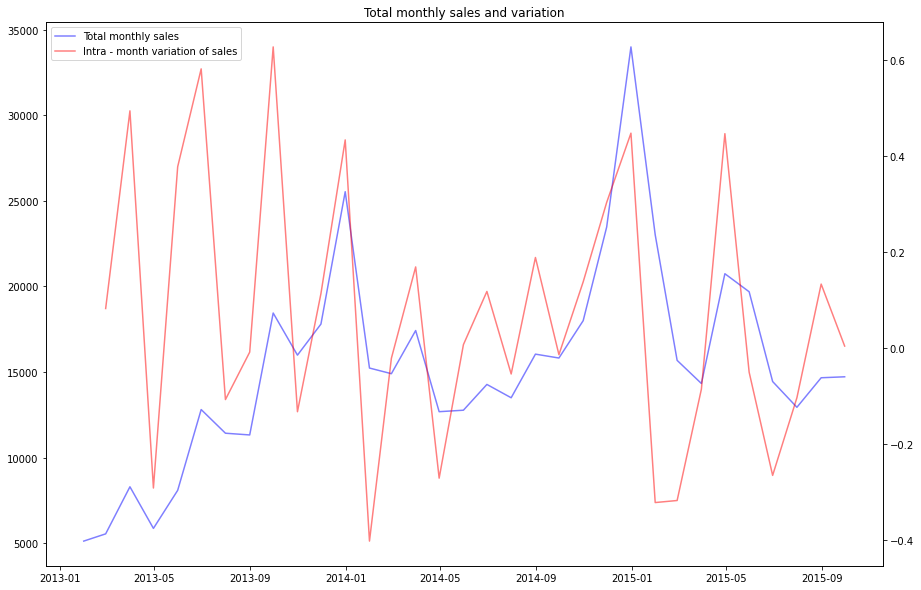

In [58]:
# separate x and y
y_sales = df_var["item_cnt_day"]
y_variation = df_var["Variation"]

# instanciate the figure
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

# plot the total sales
plot1 = ax.plot(y_sales, label = "Total monthly sales", color = "blue", alpha = 0.5)

# create a secondary axis and plot the variation data
ax_bis = ax.twinx()
plot2 = ax_bis.plot(y_variation, label = "Intra - month variation of sales", color = "red", alpha = 0.5)

# create a common legend for both plots
lns = plot1 + plot2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = "upper left")

# add a custom title to the plot
ax.set_title("Total monthly sales and variation");

<a id ="question_1"></a>
# Question 1: Create a plot with the moving average of total sales (7 days) and the variation on the second axis.
[Go back to the Table of Contents](#table_of_contents)

In [59]:
# start with the regular df
df_for_question_1 = create_df(path = PATH_DATA, city_dict = city_dict)

In [60]:
df_for_question_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275993 entries, 224519 to 184697
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                275993 non-null  object 
 1   date_block_num      275993 non-null  int64  
 2   shop_id             275993 non-null  int64  
 3   item_id             275993 non-null  int64  
 4   item_price          275993 non-null  float64
 5   item_cnt_day        275993 non-null  float64
 6   item_name           275993 non-null  object 
 7   item_category_id    275993 non-null  int64  
 8   item_category_name  275993 non-null  object 
 9   shop_name           275993 non-null  object 
 10  shop_name_cleaned   275993 non-null  object 
 11  city                275993 non-null  object 
 12  city_code           275993 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 29.5+ MB


In [61]:
# convert the column "date" to the datetime format
df_for_question_1["date"] = pd.to_datetime(df_for_question_1["date"], format = "%d.%m.%Y")

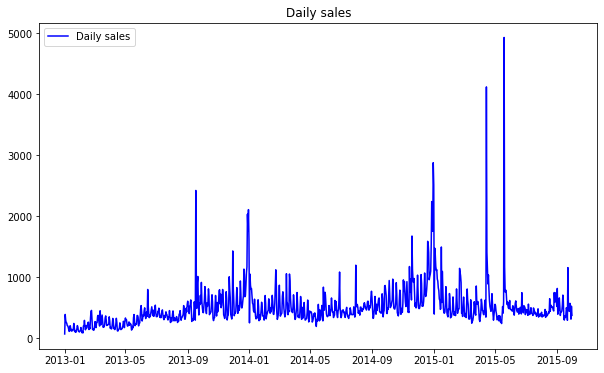

In [62]:
# resample the data on a daily basis
x = df_for_question_1[["date", "item_cnt_day"]].set_index("date").resample("D").sum()

# plot the data using matplotlib
plt.figure(figsize = (10, 6))
plt.plot(x, color = "blue", label = "Daily sales")
plt.title("Daily sales")
plt.legend();

In [63]:
# we take a look at the moving average of total sales in 7 day periods
# and at the variation of intradays sales

# select the columns of interest
df_var = df_for_question_1[["date", "item_cnt_day"]]

# set date as index
df_var.set_index("date", inplace = True)

# resample/groupby by date and convert to frame the total daily sales
df_var = df_var.resample("D")["item_cnt_day"].sum().to_frame()

# calculate the moving average of total sales in 7 day periods and the variation of the moving averages
df_var["moving_avg_7days"] = df_var["item_cnt_day"].rolling(7).mean()
df_var["variation"] = df_var["moving_avg_7days"].diff()/df_var["moving_avg_7days"].shift(1)


df_var.head(10)

,item_cnt_day,moving_avg_7days,variation
date,,,
2013-01-01,69.0,NaN,NaN
2013-01-02,389.0,NaN,NaN
2013-01-03,292.0,NaN,NaN
2013-01-04,255.0,NaN,NaN
2013-01-05,248.0,NaN,NaN
2013-01-06,208.0,NaN,NaN
2013-01-07,202.0,237.571429,NaN
2013-01-08,180.0,253.428571,0.066747
2013-01-09,141.0,218.000000,-0.139797


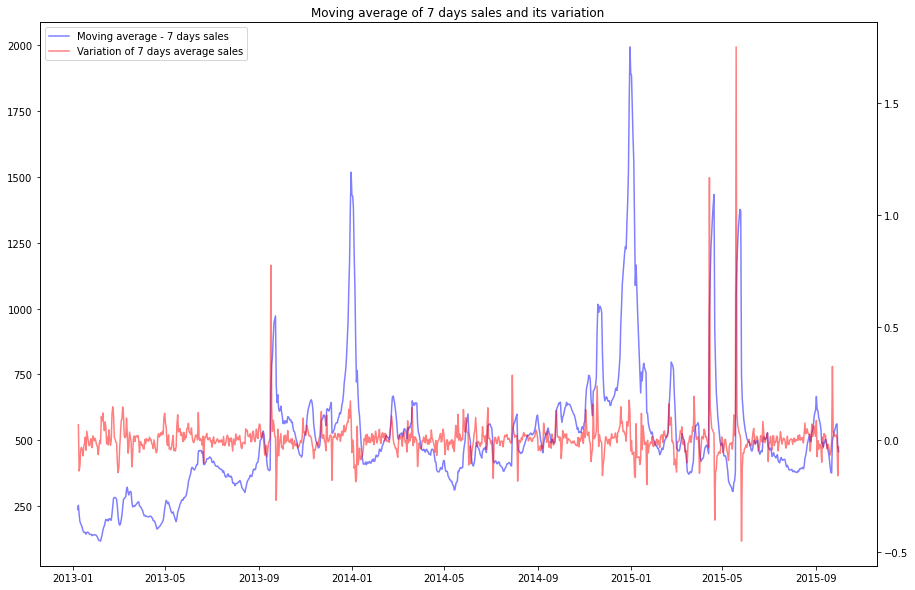

In [64]:
# separate x and y
y_sales = df_var["moving_avg_7days"]
y_variation = df_var["variation"]

# instanciate the figure
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

# plot the total sales
plot1 = ax.plot(y_sales, label = "Moving average - 7 days sales", color = "blue", alpha = 0.5)

# create a secondary axis and plot the variation data
ax_bis = ax.twinx()
plot2 = ax_bis.plot(y_variation, label = "Variation of 7 days average sales", color = "red", alpha = 0.5)

# create a common legend for both plots
lns = plot1 + plot2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = "upper left")

# add a custom title to the plot
ax.set_title("Moving average of 7 days sales and its variation");

In [65]:
# another approach: we take a look at the moving average of total weekly sales in 4 week periods
# and at the variation of the moving averages

# select the columns of interest
df_var = df_for_question_1[["date", "item_cnt_day"]]

# set date as index
df_var.set_index("date", inplace = True)

# resample/groupby by date and convert to frame the total weekly sales
df_var = df_var.resample("W")["item_cnt_day"].sum().to_frame()

# calculate the moving average in 4 week periods and its variation
df_var["moving_avg_4weeks"] = df_var["item_cnt_day"].rolling(4).mean()
df_var["variation"] = df_var["moving_avg_4weeks"].diff()/df_var["moving_avg_4weeks"].shift(1)


df_var.head(10)

,item_cnt_day,moving_avg_4weeks,variation
date,,,
2013-01-06,1461.0,NaN,NaN
2013-01-13,1186.0,NaN,NaN
2013-01-20,1061.0,NaN,NaN
2013-01-27,983.0,1172.75,NaN
2013-02-03,865.0,1023.75,-0.127052
2013-02-10,1181.0,1022.50,-0.001221
2013-02-17,1414.0,1110.75,0.086308
2013-02-24,1982.0,1360.50,0.224848
2013-03-03,1247.0,1456.00,0.070195


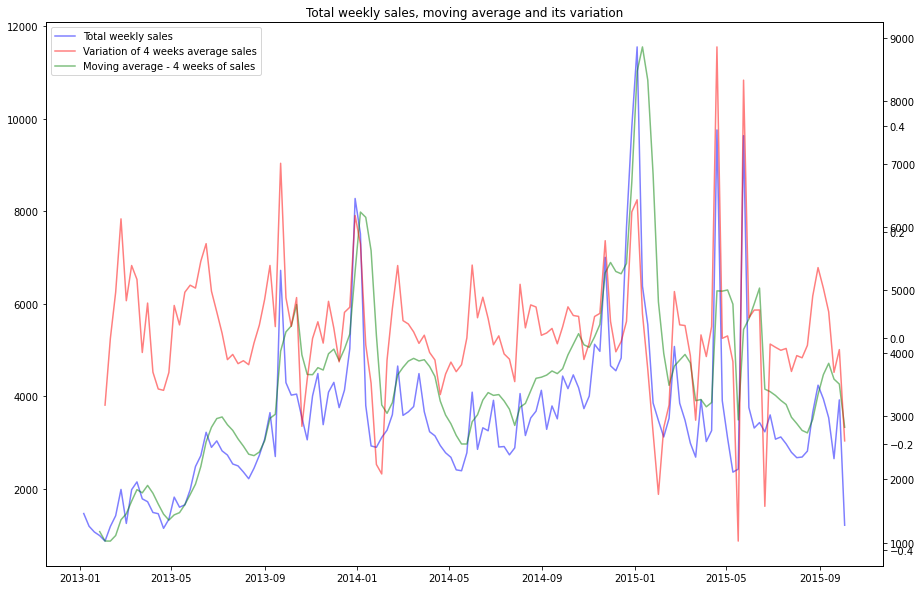

In [66]:
# separate x and y
y_sales = df_var["item_cnt_day"]
y_avg_4weeks = df_var["moving_avg_4weeks"]
y_variation = df_var["variation"]

# instanciate the figure
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

# plot the total sales
plot1 = ax.plot(y_sales, label = "Total weekly sales", color = "blue", alpha = 0.5)

# create a secondary axis and plot the 4 weeks average data
ax_bis = ax.twinx()
plot3 = ax_bis.plot(y_avg_4weeks, label = "Moving average - 4 weeks of sales", color = "green", alpha = 0.5)

# create a third axis and plot the variation data
ax_tris = ax.twinx()
plot2 = ax_tris.plot(y_variation, label = "Variation of 4 weeks average sales", color = "red", alpha = 0.5)

# create a common legend for all plots
lns = plot1 + plot2 +plot3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = "upper left")

# add a custom title to the plot
ax.set_title("Total weekly sales, moving average and its variation");

<a id = "calendar_heatmap"></a>
# Calendar heatmap
[Go back to the Table of Contents](#table_of_contents)

In [67]:
# calendar heatmaps are really useful to see the overall activity for a certain period of time per day and per month.
# let's build one using python.
# we will be using the calmap package for this, because it makes it extremenly easy to plot this data
# select the columns
df_calendar = df[["date", "item_cnt_day"]]

# set date as index and resample
df_calendar.set_index("date", inplace = True)
# notice that this time, we don't convert it to_frame()
# df_calendar is a pandas series
# THIS IS IMPORTANT since calmap expects a series
# with a datetime index and the values to plot
df_calendar = df_calendar.resample("D")["item_cnt_day"].sum()
df_calendar.head()

date
2013-01-01     69.0
2013-01-02    389.0
2013-01-03    292.0
2013-01-04    255.0
2013-01-05    248.0
Freq: D, Name: item_cnt_day, dtype: float64

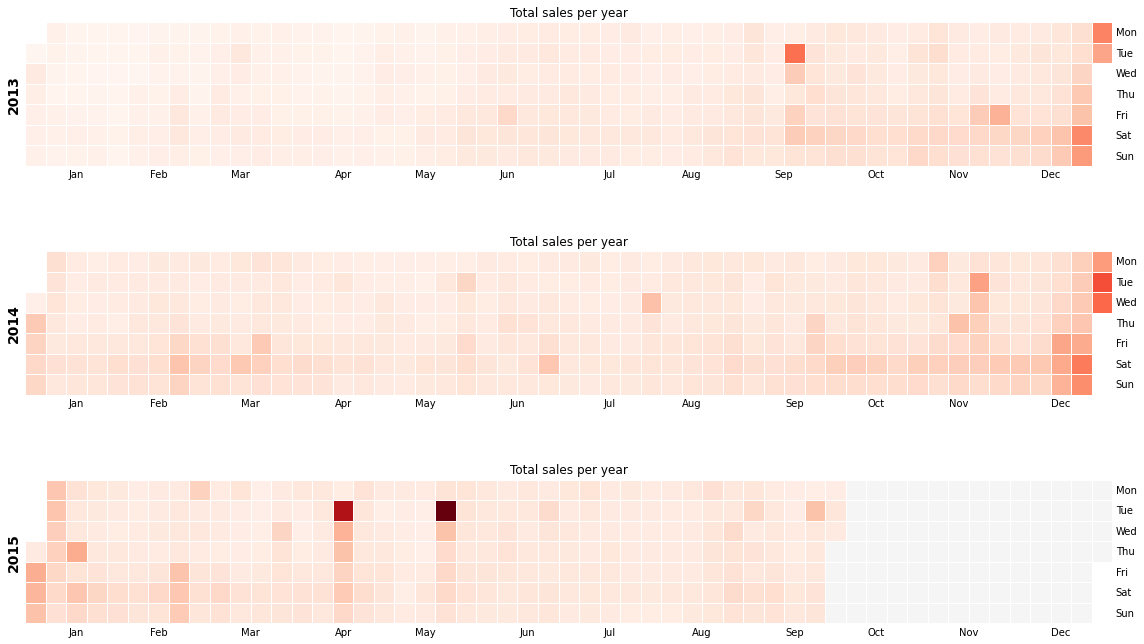

In [68]:
# ----------------------------------------------------------------------------------------------------
# plot the data using calmap
calmap.calendarplot(df_calendar, # pass the series
                    fig_kws = {'figsize': (16,10)}, 
                    yearlabel_kws = {'color':'black', 'fontsize':14}, 
                    subplot_kws = {'title':'Total sales per year'});

<a id = "corr_plots_daily"></a>
# Timeseries autocorrelation and partial autocorrelation plots: daily sales
[Go back to the Table of Contents](#table_of_contents)

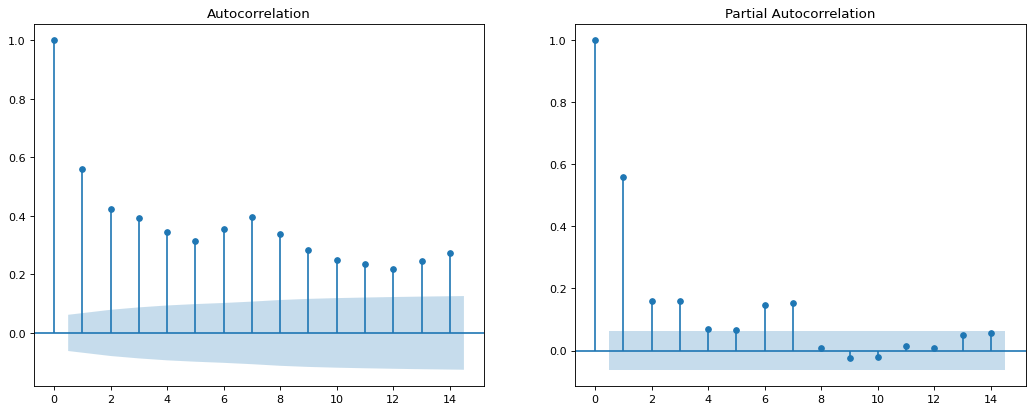

In [69]:
# This plot are fundamental in timeseries analysis.
# Basically here we compare the a series again itself but with some lags.
# These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.

# More info: 
# https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,6), dpi = 80)

# ----------------------------------------------------------------------------------------------------
# plot the data using the built in plots from the stats module

# The AutoCorrelation plot: compares a value v with the value v but n times in the past.
plot_acf(df.set_index("date").resample("D")["item_cnt_day"].sum(), ax = ax1, lags = 14)

# The Parcial AutoCorrelation plot: partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.
plot_pacf(df.set_index("date").resample("D")["item_cnt_day"].sum(), ax = ax2, lags = 14);

<a id = "autocorrelation_calculation"></a>
# Manually calculate the Partial Autocorrelation
[Go back to the Table of Contents](#table_of_contents)

In [70]:
# This code snippets show you have to calculate the Partial Autocorrelation
# Partial Autocorrelation can be very counter intuitive since in some of our steps we are fitting a linear model
# to predict the values of t - 2 using t - 1
# Wait, what? Why we use values from yesterday to predict values before yesterday?
# Basically because we assume that our timeseries is auto regressive. This means that the data at point t captures
# all the variance/information from all the previuos data points.
# This way, t - 1, must have captured all the variance from previous points, thus t - 2, and so t - 1 becomes
# a good predictor for values from t - 2.

In [71]:
# create a dataframe with total sales per day (all shops and all items)
df_total_sales = df.set_index("date").resample("D")["item_cnt_day"].sum().to_frame()

# rename the column item_cnt_day to total_sales
df_total_sales.columns = ["total_sales"]


In [72]:
df_total_sales.head()

,total_sales
date,
2013-01-01,69.0
2013-01-02,389.0
2013-01-03,292.0
2013-01-04,255.0
2013-01-05,248.0


In [73]:

# create a few features that we need in order to calculate the parcial autocorrelation
df_total_sales["T-1"] = df_total_sales["total_sales"].shift(1)
df_total_sales["T-2"] = df_total_sales["total_sales"].shift(2)

# we have a few nan for the first 2 rows so we must drop them
print(df_total_sales.shape)
df_total_sales.dropna(axis = "rows", inplace = True)
print(df_total_sales.shape)

(1003, 3)
(1001, 3)


In [75]:
# instanciate the Linear model
model = LinearRegression()

# separate X and y
X = df_total_sales[["T-1"]]
y = df_total_sales["total_sales"]

# fit and predict with the model
model.fit(X, y)
predictions = model.predict(X)

# save our predictions to the total_sales df
df_total_sales["total_sales_from_T-1"] = predictions

In [76]:
df_total_sales.head()

,total_sales,T-1,T-2,total_sales_from_T-1
date,,,,
2013-01-03,292.0,389.0,69.0,439.425732
2013-01-04,255.0,292.0,389.0,385.039123
2013-01-05,248.0,255.0,292.0,364.293716
2013-01-06,208.0,248.0,255.0,360.368909
2013-01-07,202.0,208.0,248.0,337.941442


In [77]:
# instanciate the Linear model
model = LinearRegression()

# separate X and y
X = df_total_sales[["T-1"]]
y = df_total_sales["T-2"]

# fit and predict with the model
model.fit(X, y)
predictions = model.predict(X)

# save our predictions to the total_sales df
df_total_sales["T-2_from_T-1"] = predictions

In [78]:
df_total_sales.head()

,total_sales,T-1,T-2,total_sales_from_T-1,T-2_from_T-1
date,,,,,
2013-01-03,292.0,389.0,69.0,439.425732,438.935191
2013-01-04,255.0,292.0,389.0,385.039123,384.503825
2013-01-05,248.0,255.0,292.0,364.293716,363.741346
2013-01-06,208.0,248.0,255.0,360.368909,359.813309
2013-01-07,202.0,208.0,248.0,337.941442,337.367385


In [79]:
# calculate the residual
# this means: total_sales - total_sales_from_T-1
# and: T-2 - "T-2_from_T-1"
df_total_sales["Residual_total_sales_T-1"] = df_total_sales["total_sales"] - df_total_sales["total_sales_from_T-1"]

# this step is very important based on the asumptions we have about many of the timeseries
# for more information I recommend this read
# https://towardsdatascience.com/understanding-partial-auto-correlation-fa39271146ac
df_total_sales["Residual_T-2_T-1"] = df_total_sales["T-2"] - df_total_sales["T-2_from_T-1"]

In [80]:
df_total_sales.head()

,total_sales,T-1,T-2,total_sales_from_T-1,T-2_from_T-1,Residual_total_sales_T-1,Residual_T-2_T-1
date,,,,,,,
2013-01-03,292.0,389.0,69.0,439.425732,438.935191,-147.425732,-369.935191
2013-01-04,255.0,292.0,389.0,385.039123,384.503825,-130.039123,4.496175
2013-01-05,248.0,255.0,292.0,364.293716,363.741346,-116.293716,-71.741346
2013-01-06,208.0,248.0,255.0,360.368909,359.813309,-152.368909,-104.813309
2013-01-07,202.0,208.0,248.0,337.941442,337.367385,-135.941442,-89.367385


In [81]:
# calculathe the parcial autocorrelation using manual method
manual_pacf = df_total_sales.corr(method = "pearson")["Residual_total_sales_T-1"]["Residual_T-2_T-1"]
print("Manual parcial autocorrelation method {}".format(round(manual_pacf, 5)))

# calculate the parcial autocorrelation using statsmodel package
stats_pacf = pacf(df_total_sales['total_sales'], nlags = 2)[2]
print("Parcial autocorrelation method using stats package {}".format(round(stats_pacf, 5)))

Manual parcial autocorrelation method 0.15871
Parcial autocorrelation method using stats package 0.15844


<a id = "decomp_weekly"></a>
# Timeseries decomposition plots: weekly sales
[Go back to the Table of Contents](#table_of_contents)

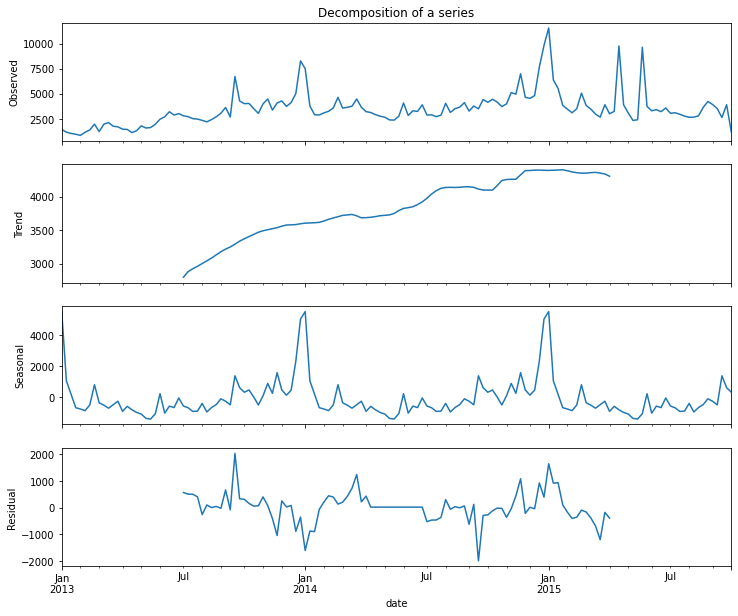

In [82]:
df_timeindex = df.set_index("date").resample("W")["item_cnt_day"].sum().to_frame()

# decompose the series using stats module
# results in this case is a special class 
# whose attributes we can acess
result = seasonal_decompose(df_timeindex["item_cnt_day"])

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
# make the subplots share teh x axis
fig, axes = plt.subplots(ncols = 1, nrows = 4, sharex = True, figsize = (12,10))

# ----------------------------------------------------------------------------------------------------
# plot the data
# using this cool thread:
# https://stackoverflow.com/questions/45184055/how-to-plot-multiple-seasonal-decompose-plots-in-one-figure
# This allows us to have more control over the plots

# plot the original data
result.observed.plot(ax = axes[0], legend = False)
axes[0].set_ylabel('Observed')
axes[0].set_title("Decomposition of a series")

# plot the trend
result.trend.plot(ax = axes[1], legend = False)
axes[1].set_ylabel('Trend')

# plot the seasonal part
result.seasonal.plot(ax = axes[2], legend = False)
axes[2].set_ylabel('Seasonal')

# plot the residual
result.resid.plot(ax = axes[3], legend = False)
axes[3].set_ylabel('Residual')

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# get the xticks and the xticks labels
xtick_location = df_timeindex.index.tolist()

# set x_ticks
ax.set_xticks(xtick_location);

<a id = "question_2"></a>
# Question 2: Create a decomposition plot for a city of weekly sales
[Go back to the Table of Contents](#table_of_contents)

In [119]:
# start with the regular df
df_for_question_2 = create_df(path = PATH_DATA, city_dict = city_dict)

In [120]:
# take a look at the cities in the dataset
df_for_question_2['city'].unique()

array(['Voronezh', 'Tienda Online', 'Kaluga', 'Kolomna', 'Krasnoyarsk',
       'Kursk', 'Moscú', 'Nizhny Novgorod', 'Omsk', 'San Petersburgo',
       'Posad', 'Surgut', 'Tyumen', 'Ufa', 'Checos', 'Yakutsk'],
      dtype=object)

In [122]:
# filter by one cityname
df_for_question_2 = df_for_question_2[df_for_question_2['city'] == 'San Petersburgo']

In [124]:
# convert to datetime
df_for_question_2["date"] = pd.to_datetime(df_for_question_2["date"], format = "%d.%m.%Y")

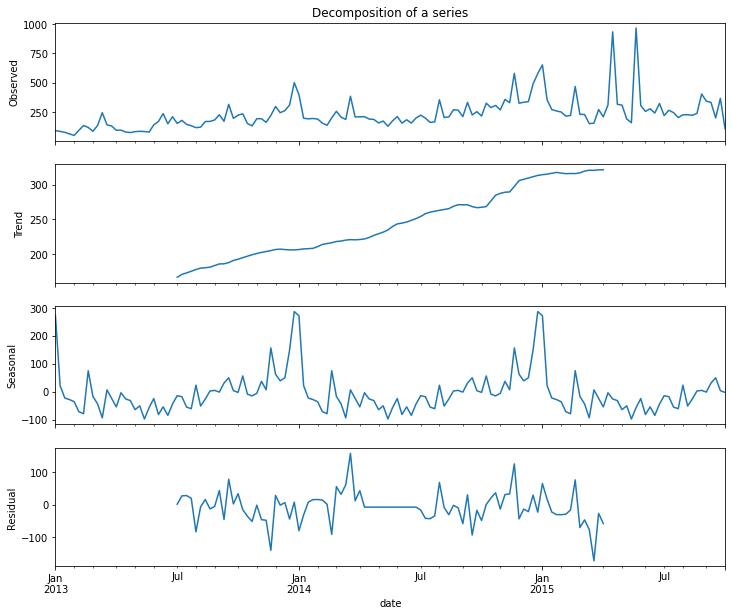

In [125]:
df_timeindex = df_for_question_2.set_index("date").resample("W")["item_cnt_day"].sum().to_frame()

# decompose the series using stats module
# results in this case is a special class 
# whose attributes we can acess
result = seasonal_decompose(df_timeindex["item_cnt_day"])

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
# make the subplots share teh x axis
fig, axes = plt.subplots(ncols = 1, nrows = 4, sharex = True, figsize = (12,10))

# ----------------------------------------------------------------------------------------------------
# plot the data
# using this cool thread:
# https://stackoverflow.com/questions/45184055/how-to-plot-multiple-seasonal-decompose-plots-in-one-figure
# This allows us to have more control over the plots

# plot the original data
result.observed.plot(ax = axes[0], legend = False)
axes[0].set_ylabel('Observed')
axes[0].set_title("Decomposition of a series")

# plot the trend
result.trend.plot(ax = axes[1], legend = False)
axes[1].set_ylabel('Trend')

# plot the seasonal part
result.seasonal.plot(ax = axes[2], legend = False)
axes[2].set_ylabel('Seasonal')

# plot the residual
result.resid.plot(ax = axes[3], legend = False)
axes[3].set_ylabel('Residual')

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# get the xticks and the xticks labels
xtick_location = df_timeindex.index.tolist()

# set x_ticks
ax.set_xticks(xtick_location);

<a id = "viz_cities"></a>
# Visualizing the most important cities
[Go back to the Table of Contents](#table_of_contents)

Treemaps are a very useful and visual tools to see different categories and their overall importance in a dataset.
Also, they are very cool and easy to make using Python and squarify.

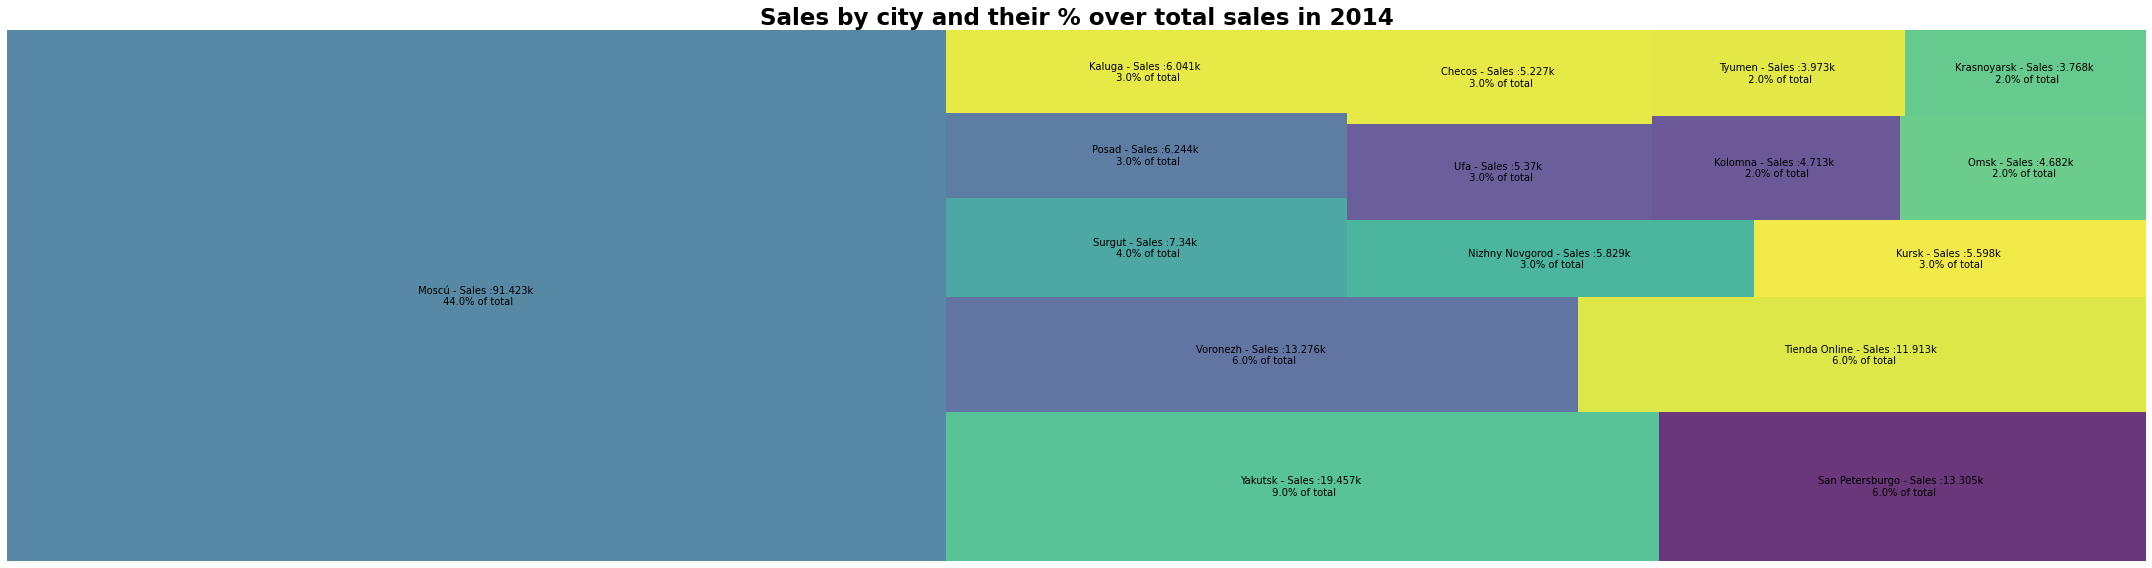

In [126]:
# prepare the data

# extract each year using dt.year
df["YEAR"] = df["date"].dt.year

short_df = df[df["YEAR"] == 2014][["item_cnt_day", "city"]]
short_df = short_df.groupby("city")["item_cnt_day"].sum().to_frame()
short_df.sort_values("item_cnt_day", ascending = False, inplace = True)

my_values = short_df["item_cnt_day"]
my_pct = short_df["item_cnt_day"]/short_df["item_cnt_day"].sum()
labels = ['{} - Sales :{}k \n {}% of total'.format(city, sales/1000, round(pct, 2)*100) for city, sales, pct in zip(short_df.index, my_values, my_pct)]

plt.figure(figsize = (30, 8))
squarify.plot(sizes = my_values, label = labels,  alpha = 0.8)
plt.title("Sales by city and their % over total sales in 2014",fontsize = 23, fontweight = "bold")

plt.axis('off')
plt.tight_layout()

In [128]:
df[["city", "city_code"]].drop_duplicates()

,city,city_code
224519,Voronezh,26
268848,Tienda Online,20
164150,Kaluga,4
235331,Kolomna,7
200657,Krasnoyarsk,8
26081,Kursk,9
36441,Moscú,10
108260,Nizhny Novgorod,12
207114,Omsk,14
134132,San Petersburgo,18


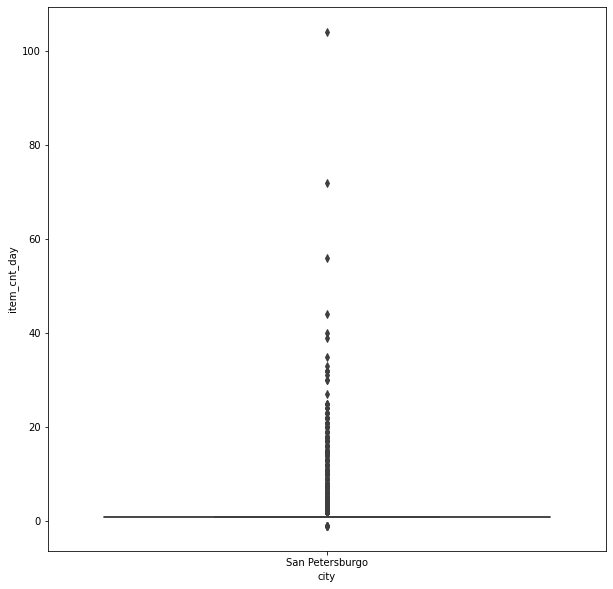

In [132]:
# treemaps are very useful to see the difference and the weights of categories
# but they don't give us that much of information about the distribution of each category
# let's use boxplot to see the distribution of a city

plt.figure(figsize = (10, 10))
sns.boxplot(x = "city",
            y = "item_cnt_day", 
            data = df[(df["YEAR"] == 2013) & (df["city_code"] == 18)]);

<a id = "question_3"></a>
# Question 3: Create a treemap plot for item_category and the total combined sales

<span style="color:red">If the % of a category over total is less 1%, don't put any label!!!</span>

[Go back to the Table of Contents](#table_of_contents)

In [151]:
# start with the regular df
df_for_question_3 = create_df(path = PATH_DATA, city_dict = city_dict)

In [152]:
# convert to datetime
df_for_question_3["date"] = pd.to_datetime(df_for_question_3["date"], format = "%d.%m.%Y")

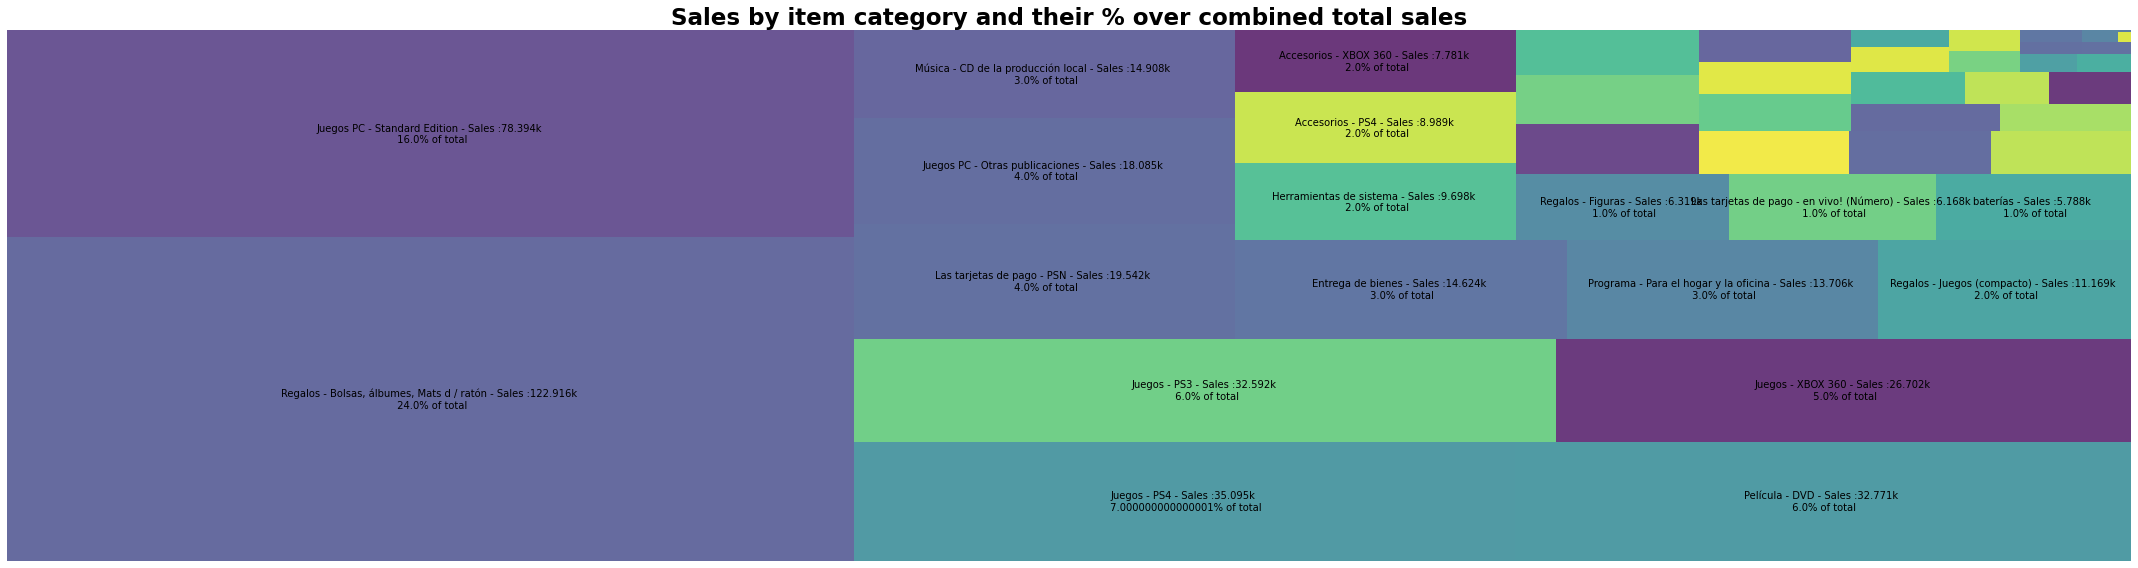

In [153]:
# prepare the data

# extract each year using dt.year
df_for_question_3["YEAR"] = df_for_question_3["date"].dt.year

short_df = df_for_question_3[["item_cnt_day", "item_category_name"]]
short_df = short_df.groupby("item_category_name")["item_cnt_day"].sum().to_frame()
short_df.sort_values("item_cnt_day", ascending = False, inplace = True)

my_values = short_df["item_cnt_day"]
my_pct = short_df["item_cnt_day"]/short_df["item_cnt_day"].sum()
# select item categories with at least 1% of overall sales
my_pct = my_pct[my_pct >= 0.01]

labels = ['{} - Sales :{}k \n {}% of total'.format(item_category_name, sales/1000, round(pct, 2)*100) for item_category_name, sales, pct in zip(short_df.index, my_values, my_pct)]

plt.figure(figsize = (30, 8))
squarify.plot(sizes = my_values, label = labels,  alpha = 0.8)
plt.title("Sales by item category and their % over combined total sales",fontsize = 23, fontweight = "bold")

plt.axis('off')
plt.tight_layout()

<a id = "viz_null_values"></a>
# Visualizing nulls values
[Go back to the Table of Contents](#table_of_contents)

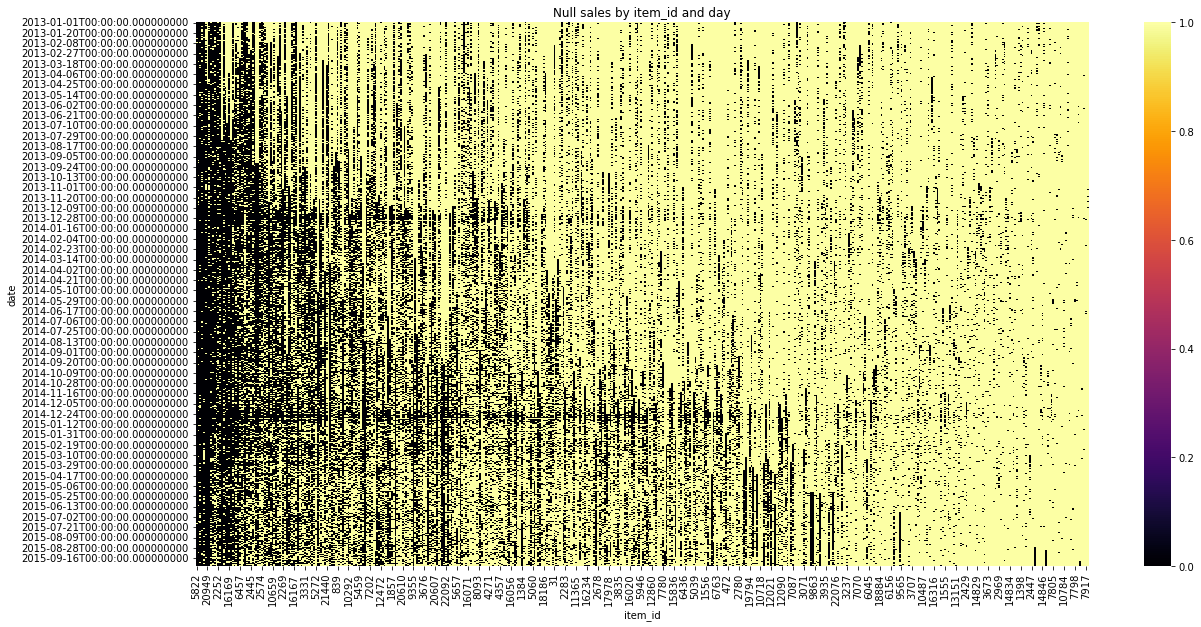

In [161]:
# This plot will help us visualize the missing values for each datetime and item_id
# This is the most granular plots possible, since we will be seeing individual sales by day and item_id
# This plot can be very consufing, but the main point is to show all the "missing values" we have
# We have seen previously in our EDA, that when we groupby and resamples our sales, we might think
# that we don't have any missing values. But its not true, we only have the reported sales
# This means that, if we have a shop or item_id that only had 3 sales per year, when we resample
# our df by day, pandas will generate additional days with null sales.
# those null sales is what we want to plot here
# the values are ordered from less nulls to more nulls

gb_df_ = df.pivot_table(index = ["date"], columns = ['item_id'], values = "item_cnt_day", aggfunc = sum).isnull()
order_of_columns = list(gb_df_.sum().sort_values().index)
gb_df_ = gb_df_[order_of_columns]

plt.figure(figsize = (20, 10))
plot = sns.heatmap(gb_df_, cbar = True, cmap = "inferno")
plot.set_title("Null sales by item_id and day");

In [162]:
# create a smaller df
short_df = df[["date", "item_cnt_day", "item_category_name"]]

# set the date to be the index (to resample later)
short_df.set_index("date", inplace = True)

# groupby by shop_name
gb = short_df.groupby("item_category_name")

# resample the df by month sales (resample = groupby by months in timeseries)
gbr = gb.resample("M")["item_cnt_day"].sum()

# unstack the gbr to have columns name
gbr = gbr.unstack(level = -1).T

# sort the values, from no nulls to more null values
order_of_columns = list(gbr.isnull().sum().sort_values().index)

# change the order of the df
gbr = gbr[order_of_columns]

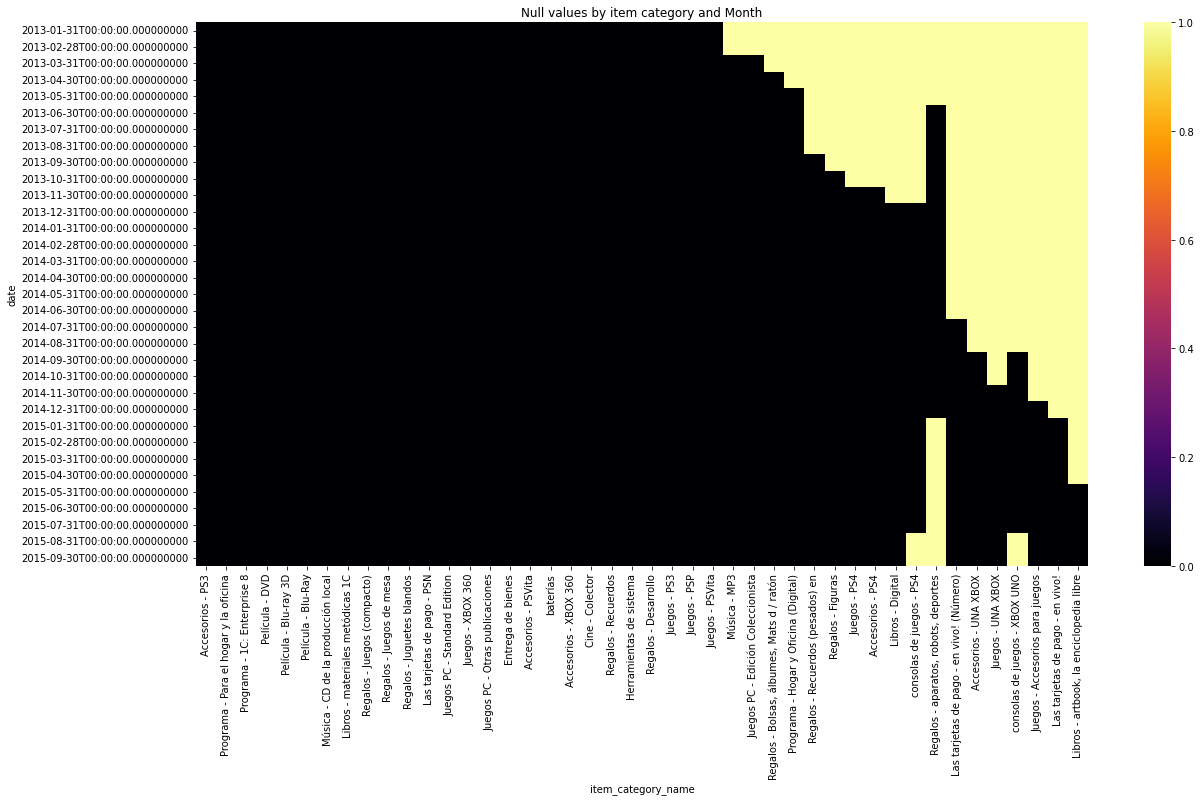

In [164]:
# let's plot the null values for each shop
plt.figure(figsize=(20, 10))

# this lines gbr.unstack(level = -1).T.isnull()*1
# converts any null to 1 and the rest will be 0
sns.heatmap(gbr.isnull()*1, cmap = "inferno", cbar = True).set_title("Null values by item category and Month");

<a id = "viz_outliers"></a>
# Visualization of outliers
[Go back to the Table of Contents](#table_of_contents)

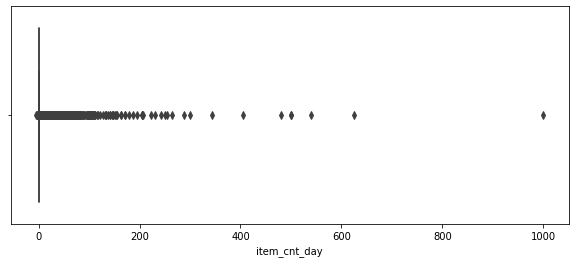

In [165]:
# let's look at outliers for item sales
# We will use boxplots because they are very useful to see the distribution of values
plt.figure(figsize = (10,4))
sns.boxplot(x = df["item_cnt_day"]);

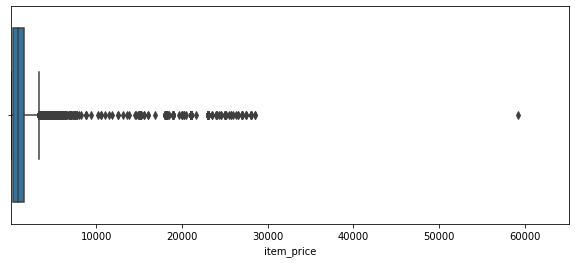

In [166]:
# let's look at outliers for item price
plt.figure(figsize = (10,4))
plt.xlim(df["item_price"].min(), df["item_price"].max()*1.1)
sns.boxplot(x = df["item_price"]);

<Figure size 720x288 with 0 Axes>

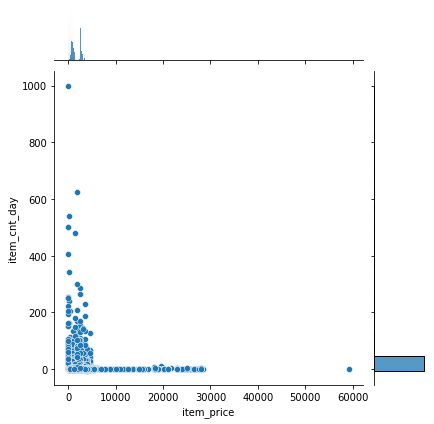

In [167]:
# joint plot is another very convenient way to plot the relationship between 2 variables
# but because we have huge outliers, we don't see them 
# https://seaborn.pydata.org/generated/seaborn.jointplot.html
plt.figure(figsize = (10,4))
sns.jointplot(x = "item_price", y = "item_cnt_day", data = df);

In [168]:
# let's filter the outliers and make the same joint plot
df = df[(df["item_price"] < np.percentile(df["item_price"], q = 99)) & (df["item_cnt_day"] >= 0) & (df["item_cnt_day"] < np.percentile(df["item_cnt_day"], q = 99))]

<Figure size 720x720 with 0 Axes>

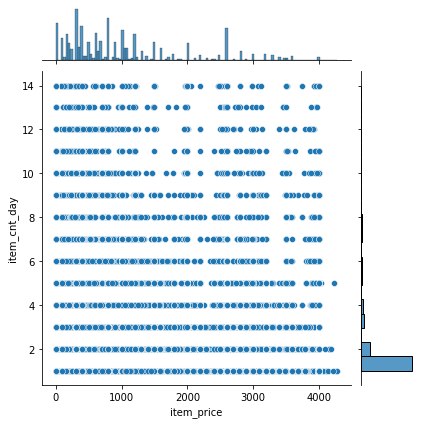

In [169]:
# we have removed the outliers and now 
plt.figure(figsize = (10, 10))
sns.jointplot(x = "item_price", y = "item_cnt_day", data = df);

<a id = "conclusion"></a>
# Conclusion
[Go back to the Table of Contents](#table_of_contents)

After taking a look at the sales data, here are some conclusion we can extract:

1. We see that the total sales decrease over time. This is very important because, we have to create features for our model that catch this trend.

2. We have seen that the sales present huge spikes in Christmas season. Datetime features can help a lot our model.

3. Data has a lot of missing values and we have not found a specific or category affected by this. More likely it's just the nature of the data.

4. Top 3 cities capture more than 50% of total sales. City based features can be very helpful for the model.

5. The top 3 categories represent more than 40% of total sales: they are Movies, PC Games and Music.

6. Data presents outliers at the sales and price level. Before generating features or training a model, data must be cleaned properly.

7. We have seen thanks to our calendar plots that we a small increase in sales on the weekends. We do see however bigger sales on 14 of February or 9 of May (holidays).